# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/student_depression_dataset.csv')
print(len(df))
df.head(10)

27901


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [3]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [4]:
# Verify no missing values
int(df.isna().sum().sum()) == 0

True

In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
# Rename columns
name_dict = {'Academic Pressure': 'academic_pressure',
       'Work Pressure':'work_pressure', 'CGPA':'gpa', 'Study Satisfaction': 'study_sat', 'Job Satisfaction':'job_sat',
       'Sleep Duration': 'sleep_dur', 'Dietary Habits':'diet',
       'Have you ever had suicidal thoughts ?':'suicidal_thoughts', 'Work/Study Hours':'study_hrs',
       'Financial Stress':'financial_stress', 'Family History of Mental Illness':'family_hist'}
df.rename(columns=name_dict, inplace=True)
df.columns = map(str.lower, df.columns)
df.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'gpa', 'study_sat', 'job_sat', 'sleep_dur', 'diet',
       'degree', 'suicidal_thoughts', 'study_hrs', 'financial_stress',
       'family_hist', 'depression'],
      dtype='object')

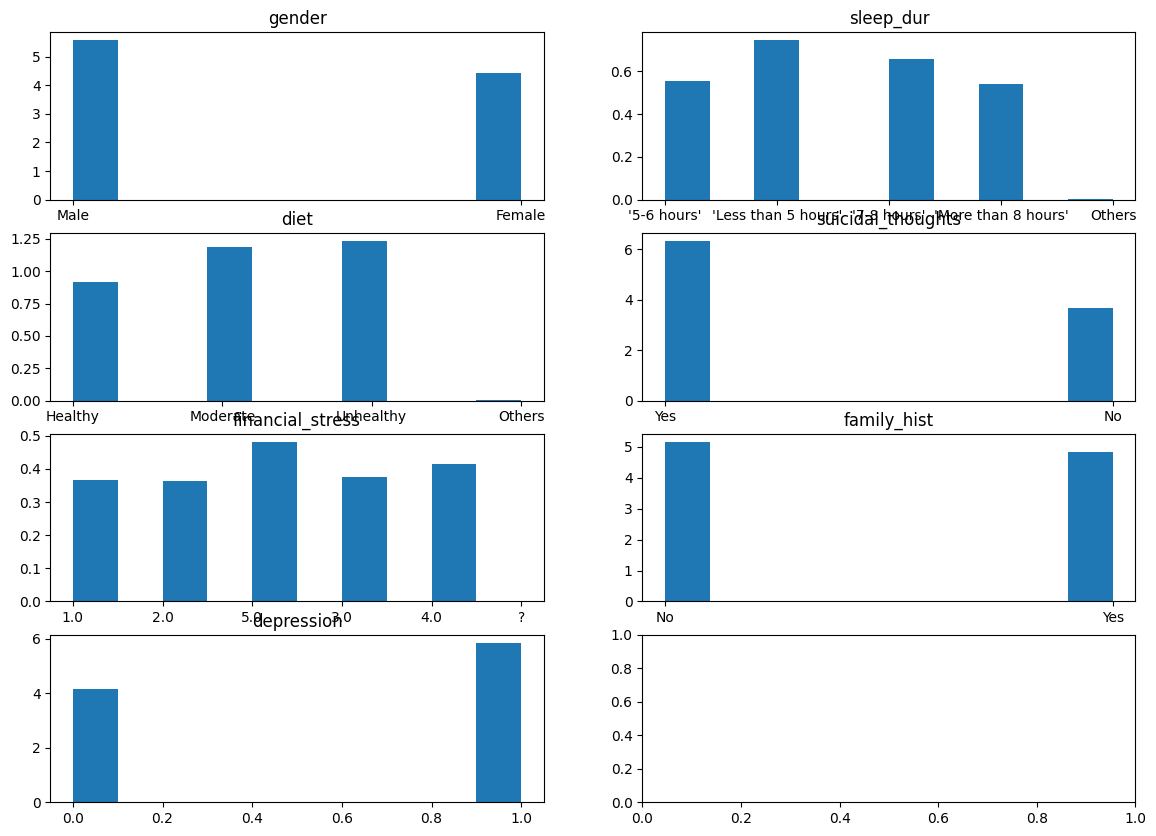

In [7]:
# Distribution of Categorial Variables, pre-processing
cats = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] == 'object']
cats.append('depression')
cats = [cat for cat in cats if cat not in ["city", 'profession', 'degree']]
fig, ax = plt.subplots(4,2, figsize=(14,10))
flat_ax = ax.flatten()
for i in list(range(len(cats))):
    flat_ax[i].hist(df[cats[i]], density=True)
    flat_ax[i].set_title(f"{cats[i]}")

In [8]:
# Drop rows where profession != student, where diet/sleep_dur = "Other", financial stress != ?
print(len(df))
df = df[(df.profession == 'Student') & (df.sleep_dur != 'Others') & (df.diet != 'Others') & (df.financial_stress != "?")]
print(len(df))

27901
27837


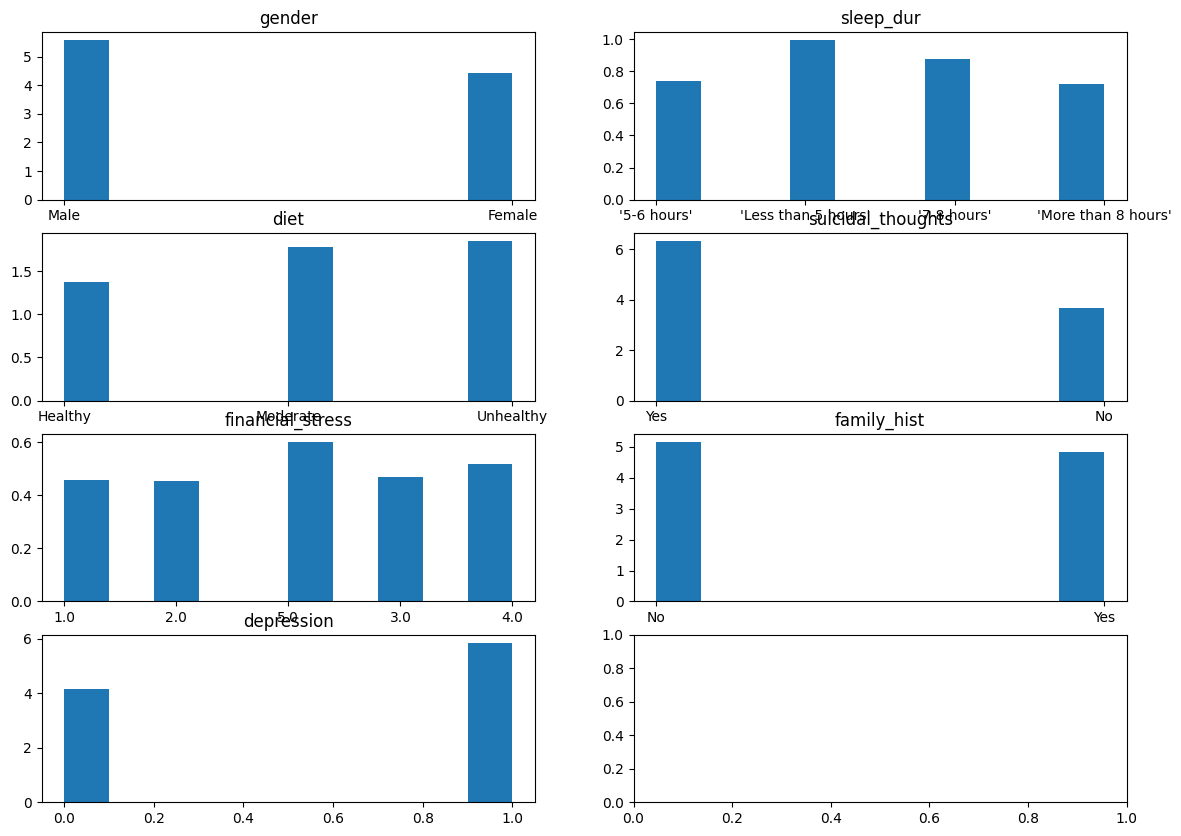

In [9]:
# Distribution of Categorial Variables, post-processing
cats = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] == 'object']
cats.append('depression')
cats = [cat for cat in cats if cat not in ["city", 'profession', 'degree']]
fig, ax = plt.subplots(4,2, figsize=(14,10))
flat_ax = ax.flatten()
for i in list(range(len(cats))):
    flat_ax[i].hist(df[cats[i]], density=True)
    flat_ax[i].set_title(f"{cats[i]}")

In [10]:
df.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'gpa', 'study_sat', 'job_sat', 'sleep_dur', 'diet',
       'degree', 'suicidal_thoughts', 'study_hrs', 'financial_stress',
       'family_hist', 'depression'],
      dtype='object')

In [11]:
# Drop unneeded columns
col_to_drop = ['city', 'degree', 'profession', 'job_sat']
df.drop(col_to_drop, axis=1, inplace=True)

In [12]:
df.columns

Index(['id', 'gender', 'age', 'academic_pressure', 'work_pressure', 'gpa',
       'study_sat', 'sleep_dur', 'diet', 'suicidal_thoughts', 'study_hrs',
       'financial_stress', 'family_hist', 'depression'],
      dtype='object')

In [13]:
df.sleep_dur.value_counts()

sleep_dur
'Less than 5 hours'    8297
'7-8 hours'            7334
'5-6 hours'            6172
'More than 8 hours'    6034
Name: count, dtype: int64

In [14]:
# Age Categories
def age_map(x):
    if x <= 22:
        return "18-22"
    elif x <= 26:
        return "23-26"
    elif x <= 30:
        return "27-30"
    else:
        return "31+"

df['age_lab'] = df.age.map(age_map)
df.age_lab.value_counts()

age_lab
18-22    8260
23-26    6822
27-30    6674
31+      6081
Name: count, dtype: int64

In [15]:
# Reset Index
df.reset_index(drop=True, inplace=True)
df.head()

,id,gender,age,academic_pressure,work_pressure,gpa,study_sat,sleep_dur,diet,suicidal_thoughts,study_hrs,financial_stress,family_hist,depression,age_lab
0,2,Male,33.0,5.0,0.0,8.97,2.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1,31+
1,8,Female,24.0,2.0,0.0,5.90,5.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0,23-26
2,26,Male,31.0,3.0,0.0,7.03,5.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0,31+
3,30,Female,28.0,3.0,0.0,5.59,2.0,'7-8 hours',Moderate,Yes,4.0,5.0,Yes,1,27-30
4,32,Female,25.0,4.0,0.0,8.13,3.0,'5-6 hours',Moderate,Yes,1.0,1.0,No,0,23-26


In [16]:
def sleep_map(x):
    if x == "'Less than 5 hours'":
        return "<5"
    else:
        return ">5"
print(df.sleep_dur.value_counts())
df['sleep_lab'] = df.sleep_dur.map(sleep_map)
print(df.sleep_lab.value_counts())

sleep_dur
'Less than 5 hours'    8297
'7-8 hours'            7334
'5-6 hours'            6172
'More than 8 hours'    6034
Name: count, dtype: int64
sleep_lab
>5    19540
<5     8297
Name: count, dtype: int64


In [17]:
# Get rid of quotes in sleep_dur
df['sleep_dur'] = df['sleep_dur'].str.replace("'", "")
df.head()

,id,gender,age,academic_pressure,work_pressure,gpa,study_sat,sleep_dur,diet,suicidal_thoughts,study_hrs,financial_stress,family_hist,depression,age_lab,sleep_lab
0,2,Male,33.0,5.0,0.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,31+,>5
1,8,Female,24.0,2.0,0.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0,23-26,>5
2,26,Male,31.0,3.0,0.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0,31+,<5
3,30,Female,28.0,3.0,0.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1,27-30,>5
4,32,Female,25.0,4.0,0.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0,23-26,>5


In [18]:
# Export clean df as .csv
df.to_csv('data/clean_dataset.csv')